In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")
df = df.drop(df[df["shares"] > 5000].index, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34572 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            34572 non-null  object 
 1   timedelta                      34572 non-null  int64  
 2   n_tokens_title                 34572 non-null  int64  
 3   n_tokens_content               34572 non-null  int64  
 4   n_unique_tokens                34572 non-null  float64
 5   n_non_stop_words               34572 non-null  float64
 6   n_non_stop_unique_tokens       34572 non-null  float64
 7   num_hrefs                      34572 non-null  int64  
 8   num_self_hrefs                 34572 non-null  int64  
 9   num_imgs                       34572 non-null  int64  
 10  num_videos                     34572 non-null  int64  
 11  average_token_length           34572 non-null  float64
 12  num_keywords                   34572 non-null  int6

In [84]:
#X = df.drop(["url", "shares"], axis = 1)

X = df.drop(["url", "timedelta", "n_tokens_content", "n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens", "num_self_hrefs","kw_min_min","kw_min_max","LDA_00", "global_sentiment_polarity","global_rate_positive_words", "min_positive_polarity","abs_title_subjectivity","shares"], axis = 1)

#X = df[["num_hrefs", "data_channel_is_world","kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares","self_reference_avg_sharess", "LDA_02", "LDA_03"]]
y = df["shares"]

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [86]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [87]:
dtrObj = DecisionTreeRegressor(random_state=0)
#cross_val_score(dtrObj, train_X, train_y, cv=10)
dtrObj.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [88]:
mean_absolute_error(test_y, dtrObj.predict(test_X))

990.0607404550714

In [89]:
error_table = pd.DataFrame({"test_y":test_y, "pred_y": dtrObj.predict(test_X)})
error_table["error"] = error_table["test_y"]-error_table["pred_y"]
error_table

,test_y,pred_y,error
31305,1300,1200.0,100.0
31109,1100,1600.0,-500.0
33826,1400,1000.0,400.0
39513,1800,4400.0,-2600.0
38826,995,730.0,265.0
...,...,...,...
6867,842,2600.0,-1758.0
12337,1700,775.0,925.0
33539,1900,3200.0,-1300.0
24337,577,2800.0,-2223.0


<Axes: ylabel='error'>

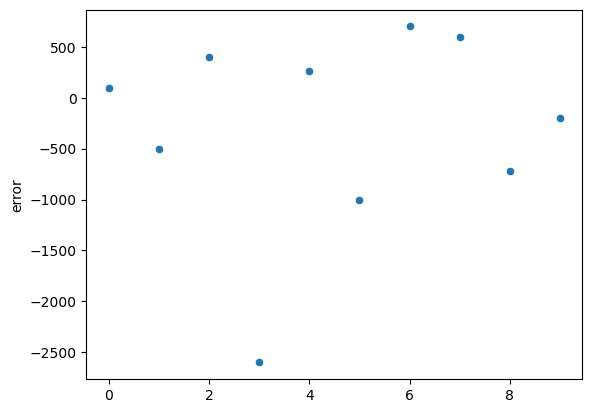

In [90]:
sns.scatterplot(error_table[:10], x= range(len(error_table[:10])),y= "error")

In [62]:
val = error_table[(error_table["error"]<1000) & (error_table["error"]> -1000)]

In [63]:
val.describe()

,test_y,pred_y,error
count,5760.000000,5760.000000,5760.000000
mean,1342.274132,1342.056076,0.218056
std,995.560623,996.911454,480.696673
min,22.000000,41.000000,-999.000000
25%,846.000000,852.000000,-378.000000
50%,1100.000000,1100.000000,0.000000
75%,1600.000000,1600.000000,348.000000
max,26500.000000,27400.000000,999.000000


In [22]:
test_y.describe()

count     11894.000000
mean       3482.516983
std       12593.378500
min           4.000000
25%         948.000000
50%        1400.000000
75%        2800.000000
max      663600.000000
Name: shares, dtype: float64

In [27]:
range(len(error_table))

range(0, 11894)

In [48]:
parameters={"splitter":["best","random"],
            "max_depth" : [1],
           "min_samples_leaf":[1],
           "min_weight_fraction_leaf":[0.1],
           "max_features":["auto"],
           "max_leaf_nodes":[None] }

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
tuning_model=GridSearchCV(dtrObj,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [51]:
tuning_model

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1], 'max_features': ['auto'],
                         'max_leaf_nodes': [None], 'min_samples_leaf': [1],
                         'min_weight_fraction_leaf': [0.1],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [52]:
tuning_model.fit(train_X, train_y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-49959815.340 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-200993093.047 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-120153140.308 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-50842176.663 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-202913828.099 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_l

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1], 'max_features': ['auto'],
                         'max_leaf_nodes': [None], 'min_samples_leaf': [1],
                         'min_weight_fraction_leaf': [0.1],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [53]:
tuning_model.best_score_

-123702016.23166978